# Data cleaning

In [2]:
import json
import pandas as pd
import time

In [15]:
d1 = "data/ognisko_label_2.bmerawdata"
d2 = "data/powietrze_label_1.bmerawdata"
d = json.load(open(d2))

In [16]:
data = pd.DataFrame(d["rawDataBody"]["dataBlock"])
data.columns = [item['key'] for item in d["rawDataBody"]["dataColumns"]]
data["date"] = pd.to_datetime(data['real_time_clock'],unit='s')

In [17]:
d

{'configHeader': {'dateCreated': '2022-12-02T21:16:24.115Z',
  'appVersion': '1.7.1',
  'boardType': 'board_8',
  'boardMode': 'burn_in',
  'boardLayout': 'grouped'},
 'configBody': {'heaterProfiles': [{'id': 'heater_354',
    'timeBase': 140,
    'temperatureTimeVectors': [[320, 5],
     [100, 2],
     [100, 10],
     [100, 30],
     [200, 5],
     [200, 5],
     [200, 5],
     [320, 5],
     [320, 5],
     [320, 5]]}],
  'dutyCycleProfiles': [{'id': 'duty_5_10',
    'numberScanningCycles': 5,
    'numberSleepingCycles': 10}],
  'sensorConfigurations': [{'sensorIndex': 0,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 1,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 2,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 3,
    'heaterProfile': 'heater_354',
    'dutyCycleProfile': 'duty_5_10'},
   {'sensorIndex': 4,
    'heaterProfile': 'heater_354',
    '

In [18]:
df = data.describe().drop(columns=["sensor_index", "sensor_id","timestamp_since_poweron", "real_time_clock",
                             "scanning_enabled", "error_code","heater_profile_step_index"  ])

In [19]:
print(df.to_latex(escape=True))

\begin{tabular}{lrrrrr}
\toprule
{} &  temperature &     pressure &  relative\_humidity &  resistance\_gassensor &  label\_tag \\
\midrule
count &  4898.000000 &  4898.000000 &        4898.000000 &          4.898000e+03 &     4898.0 \\
mean  &    17.348011 &  1009.421083 &          50.109247 &          1.033698e+07 &        1.0 \\
std   &     1.671268 &     0.188680 &           6.045616 &          1.965698e+07 &        0.0 \\
min   &    11.397330 &  1008.985840 &          36.168865 &          7.884201e+04 &        1.0 \\
25\%   &    16.306884 &  1009.288117 &          45.818574 &          2.865137e+05 &        1.0 \\
50\%   &    17.532210 &  1009.388184 &          49.240127 &          7.721018e+05 &        1.0 \\
75\%   &    18.507166 &  1009.545319 &          53.996451 &          9.712876e+06 &        1.0 \\
max   &    21.977655 &  1009.887634 &          69.909927 &          1.024000e+08 &        1.0 \\
\bottomrule
\end{tabular}



C:\Users\kubix\AppData\Local\Temp\ipykernel_21440\3205930062.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(escape=True))


In [20]:
df

,temperature,pressure,relative_humidity,resistance_gassensor,label_tag
count,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.0
mean,17.348011,1009.421083,50.109247,1.033698e+07,1.0
std,1.671268,0.188680,6.045616,1.965698e+07,0.0
min,11.397330,1008.985840,36.168865,7.884201e+04,1.0
25%,16.306884,1009.288117,45.818574,2.865137e+05,1.0
50%,17.532210,1009.388184,49.240127,7.721018e+05,1.0
75%,18.507166,1009.545319,53.996451,9.712876e+06,1.0
max,21.977655,1009.887634,69.909927,1.024000e+08,1.0


In [5]:
# fixing messed up labels, more details ask Kuba or Hania
# not needed anymore 
# fire = 2
# air = 1

""" data["fixed_label"] = 0
x = data.label_tag.to_list()
for i in range(1,len(x),1):
    if x[i-1] != x[i]:
        print(i)
data.loc[:4777, "fixed_label"] = 1
data.loc[4777:9200, "fixed_label"] = 2
data.loc[9200:13733, "fixed_label"] = 1
data.loc[13733:, "fixed_label"] = 2 """

4777
9200
13733


In [21]:
df = data[data.sensor_index == 1]
X = data[["temperature", "pressure", "relative_humidity"]]#, "resistance_gassensor"]]#, "heater_profile_step_index"]]
y = data["label_tag"]

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = MLPClassifier(hidden_layer_sizes=(32,32,32), activation='logistic',
                    random_state=100, max_iter=200).fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

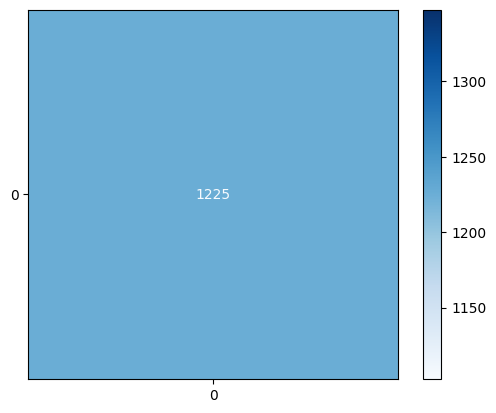

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = clf.predict(X_test)

#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=["Fire", "No fire"],
    cmap=plt.cm.Blues,
 #   normalize=normalize,
    )
    #disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()


In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8813043478260869
0.8867219917012448
0.8476794922649742
0.9295345802522836


# Zapisywanie i wczytywanie modelu

In [36]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8813043478260869
